In [226]:
import os
import pandas as pd
import json
import glob

def read_results_json_to_dataframe0(directory):
    data = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file == "list_results.json":
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    try:
                        json_data = json.load(f)
                        # Expand all list values in json_data["ALL"] into separate rows
                        all_dict = json_data["ALL"]
                        # Find the length of the lists (assume all lists are the same length)
                        n = len(next(v for v in all_dict.values() if isinstance(v, list)))
                        for i in range(n):
                            row = {k: v[i] if isinstance(v, list) else v for k, v in all_dict.items()}
                            data.append(row)
                    except json.JSONDecodeError:
                        print(f"Error decoding JSON in file: {file_path}")
    return pd.DataFrame(data)

# Example usage:
directory_path_0 =   "results_hpo/experiment_quandl_krisi_selected_assets_lstm_cpnone_len63_time_div_v1"
directory_path =     "results_hpo/experiment_quandl_krisi_selected_assets_lstm_cpnone_len63_time_div_v1"
directory_path_cp =  "results_hpo/experiment_quandl_krisi_selected_assets_lstm_cp21_len63_time_div_v1"
directory_path_cp0 = "results_hpo/experiment_quandl_krisi_selected_assets_lstm_cpnewma_21_len63_time_div_v1"
directory_path_cp1 = "results_hpo/experiment_quandl_krisi_selected_assets_lstm_cpbocd_21_len63_time_div_v1"


def read_results_jsons_from_glob1(path_pattern):
    dfs = []
    for directory in glob.glob(path_pattern):
        df = read_results_json_to_dataframe0(directory)
        if not df.empty:
            df["dir"] = directory
            # Move 'dir' to be the first level of the index
            df.set_index(["dir"], append=True, inplace=True)
            df = df.reorder_levels(["dir"] + [lvl for lvl in df.index.names if lvl != "dir"])
            dfs.append(df)
    if dfs:
        return pd.concat(dfs, ignore_index=False)
    else:
        return pd.DataFrame()

def read_results_jsons_from_globs1(path_patterns, model_names=None):
    """
    Reads results from multiple glob patterns and assigns model names.
    Args:
        path_patterns (list of str): List of glob patterns.
        model_names (list of str, optional): List of model names to assign. If None, inferred from directory.
    Returns:
        pd.DataFrame: Concatenated DataFrame with MultiIndex (model, dir, ...).
    """
    dfs = []
    for i, path_pattern in enumerate(path_patterns):
        model_name = model_names[i] if model_names is not None and i < len(model_names) else None
        df = read_results_jsons_from_glob1(path_pattern)
        if model_name is not None and not df.empty:
            df["model_name"] = model_name
            df.set_index("model_name", append=True, inplace=True)
            # Move 'model_name' to be the first level of the index
            df = df.reorder_levels(["model_name"] + [lvl for lvl in df.index.names if lvl != "model_name"])
        if not df.empty:
            dfs.append(df)
    if dfs:
        return pd.concat(dfs, ignore_index=False)
    else:
        return pd.DataFrame()
    
df = read_results_jsons_from_globs1([directory_path,directory_path_cp1],["newma","bocpd"])



In [227]:
df

annual_return  \
model_name dir                                                                   
newma      results_hpo/experiment_quandl_krisi_selected_as... 0       0.024440   
                                                              1       0.036563   
                                                              2       0.011455   
                                                              3       0.010267   
                                                              4      -0.008045   
bocpd      results_hpo/experiment_quandl_krisi_selected_as... 0      -0.001123   
                                                              1       0.020566   
                                                              2       0.010322   
                                                              3       0.006051   
                                                              4       0.000270   

                                                                 annual_volatility  \
model_name dir                                                                       
newma      results_hpo/experiment_quandl_krisi_selected_as... 0           0.013254   
                                                              1           0.011513   
                                                              2           0.008915   
                                                              3           0.006346   
                                                              4           0.010866   
bocpd      results_hpo/experiment_quandl_krisi_selected_as... 0           0.009637   
                                                              1           0.011651   
                                                              2           0.009071   
                                                              3           0.004764   
                                                              4           0.005254   

                                                                 sharpe_ratio  \
model_name dir                                                                  
newma      results_hpo/experiment_quandl_krisi_selected_as... 0      1.828454   
                                                              1      3.125040   
                                                              2      1.282107   
                                                              3      1.612792   
                                                              4     -0.737977   
bocpd      results_hpo/experiment_quandl_krisi_selected_as... 0     -0.111803   
                                                              1      1.753157   
                                                              2      1.136564   
                                                              3      1.268740   
                                                              4      0.054091   

                                                                 downside_risk  \
model_name dir                                                                   
newma      results_hpo/experiment_quandl_krisi_selected_as... 0       0.007447   
                                                              1       0.006351   
                                                              2       0.005801   
                                                              3       0.003295   
                                                              4       0.008119   
bocpd      results_hpo/experiment_quandl_krisi_selected_as... 0       0.005400   
                                                              1       0.007351   
                                                              2       0.006171   
                                                              3       0.003175   
                                                              4       0.004152   

                                                                 sortino_ratio  \
model_n

In [228]:
# import matplotlib.pyplot as plt

# for label in df1.index.get_level_values(0).unique():
#     df1.xs(label, level=0)["sharpe_ratio"].plot(style='o-', label=label, color='C0')
# for label in df.index.get_level_values(0).unique():
#     df.xs(label, level=0)["sharpe_ratio"].plot(style='o-', label=label, color='C1')
# # for label in df1.index.get_level_values(0).unique():
# plt.show()
# # df.min(0, level=1)["annual_return"].plot(style=':', color='red', label='Min')
# # df.max(0, level=1)["annual_return"].plot(style=':', color='red', label='Max')
# df["sharpe_ratio"].mean(level=1).plot(style='--', color='red', label='Mean')
# # df1.min(0, level=1)["annual_return"].plot(style=':', color='purple', label='Min')
# # df1.max(0, level=1)["annual_return"].plot(style=':', color='purple', label='Max')
# df1["sharpe_ratio"].mean(level=1).plot(style='--', color='purple', label='Mean')
# plt.legend(["none",  "cpd21",])

# plt.title("Annual Return")
# plt.ylabel("Annual Return")
# # plt.legend()
# plt.show()

In [258]:
def read_results_json_to_dataframe1(directory):
    data = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file == "average_results.json":
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    try:
                        json_data = json.load(f)
                        # Expand all list values in json_data["ALL"] into separate rows
                        all_dict = json_data["ALL"]
                        data.append(all_dict)
                    except json.JSONDecodeError:
                        print(f"Error decoding JSON in file: {file_path}")
    return pd.DataFrame(data)

# Example usage:
directory_path_0 =   "results_hpo/experiment_quandl_krisi_selected_assets_lstm_cpnone_len63_time_div_v1"
directory_path =     "results_hpo/experiment_quandl_krisi_selected_assets_lstm_cpnone_len63_time_div_v1"
directory_path_cp =  "results_hpo/experiment_quandl_krisi_selected_assets_lstm_cp21_len63_time_div_v1"
directory_path_cp0 = "results_hpo/experiment_quandl_krisi_selected_assets_lstm_cpnewma_21_len63_time_div_v1"
# directory_path_cp0 = "results_hpo/experiment_quandl_krisi_selected_assets_lstm_cpnewma_21_len63_time_div_v1"
directory_path_cp1 = "results_hpo/experiment_quandl_krisi_selected_assets_lstm_cpbocd_21_len63_time_iv_v1"



def read_results_jsons_from_globs(path_patterns, model_names=None):
    """
    Reads results from multiple glob patterns and assigns model names.
    Args:
        path_patterns (list of str): List of glob patterns.
        model_names (list of str, optional): List of model names to assign. If None, inferred from directory.
    Returns:
        pd.DataFrame: Concatenated DataFrame with MultiIndex (model, dir, ...).
    """
    dfs = []
    for i, path_pattern in enumerate(path_patterns):
        model_name = model_names[i] if model_names is not None and i < len(model_names) else None
        df = read_results_jsons_from_glob1(path_pattern)
        if model_name is not None and not df.empty:
            df["model_name"] = model_name
            df.set_index("model_name", append=True, inplace=True)
            # Move 'model_name' to be the first level of the index
            df = df.reorder_levels(["model_name"] + [lvl for lvl in df.index.names if lvl != "model_name"])
        if not df.empty:
            dfs.append(df)
    if dfs:
        return pd.concat(dfs, ignore_index=False)
    else:
        return pd.DataFrame()
directory_path = "results/experiment_quandl_krisi_selected_assets_lstm_cp21_len63_time_div_v*"
directory_path1 = "results/experiment_quandl_krisi_selected_assets_lstm_cpnone_len63_time_div_v*"
dp0 = "results/experiment_quandl_08val_5years_split80_lstm_cpnone_len63_time_val*"

dp1 = "results/long_only*"
dp2 = "results/tsmom*"
# dp3 = "results/experiment_quandl_08val_5years_split80_lstm_cpnewma_21_len63_time_val_v*"
dp3 = "/home/mkoshil/Documents/projects/second_thesis/trading-momentum-transformer/results/experiment_quandl_08val_split80_lstm_cpnewma_21_len63_time_div_v*"

directory_path_cp1 = "results/experiment_quandl_08val_5years_split80_lstm_cpbocd_21_len63_time_val_v*"
paths = [dp0,directory_path,directory_path1,dp1,dp2,dp3,directory_path_cp1]
names = ["none_nohpo","GP21", "LSTM","LONG", "TSMOM","NEWMA","BOCPD"]
df = read_results_jsons_from_globs(paths,names)
# df1 = read_results_jsons_from_glob(directory_path1 + "*","none")

# Plot the mean of each column per model (level 0 of the MultiIndex)
mean_df = df.groupby(level=[0,2]).mean()
import matplotlib.pyplot as plt

# for col in mean_df.columns[:9]:
#     ax = mean_df[col].unstack(level=0).plot(marker='o')
#     ax.set_title(col)
#     ax.set_xlabel("Index (level 1)")
#     ax.set_ylabel(col)
#     plt.legend(title="model_name")
#     plt.show()

In [259]:
df

annual_return  \
model_name dir                                                                   
none_nohpo results/experiment_quandl_08val_5years_split80_... 0       0.003519   
                                                              1       0.018521   
                                                              2       0.009715   
                                                              3       0.019995   
                                                              4      -0.025991   
...                                                                        ...   
BOCPD      results/experiment_quandl_08val_5years_split80_... 0      -0.009996   
                                                              1       0.030043   
                                                              2      -0.007611   
                                                              3       0.049793   
                                                              4      -0.016140   

                                                                 annual_volatility  \
model_name dir                                                                       
none_nohpo results/experiment_quandl_08val_5years_split80_... 0           0.012531   
                                                              1           0.013112   
                                                              2           0.014271   
                                                              3           0.011764   
                                                              4           0.019323   
...                                                                            ...   
BOCPD      results/experiment_quandl_08val_5years_split80_... 0           0.015722   
                                                              1           0.012203   
                                                              2           0.015807   
                                                              3           0.012692   
                                                              4           0.014651   

                                                                 sharpe_ratio  \
model_name dir                                                                  
none_nohpo results/experiment_quandl_08val_5years_split80_... 0      0.286548   
                                                              1      1.406191   
                                                              2      0.684563   
                                                              3      1.688790   
                                                              4     -1.353155   
...                                                                       ...   
BOCPD      results/experiment_quandl_08val_5years_split80_... 0     -0.631132   
                                                              1      2.431803   
                                                              2     -0.475436   
                                                              3      3.835475   
                                                              4     -1.103255   

                                                                 downside_risk  \
model_name dir                                                                   
none_nohpo results/experiment_quandl_08val_5years_split80_... 0       0.008572   
                                                              1       0.008428   
                                                              2       0.009158   
                                                              3       0.007528   
                                                              4       0.016158   
...                                                                        ...   
BOCPD      results/experiment_quandl_08val_5years_split80_... 0       0.012314   
                                                              1       0.007362   
     

In [260]:
import re

def to_latex(df):
    """Convert a DataFrame to a LaTeX table format."""
    # Convert percentage columns to formatted strings
    cols = df.columns
    percent_cols = [c for c in cols if not any(x in c for x in ["sharpe_ratio", "sortino_ratio", "calmar_ratio", "profit_loss_ratio",])]
    for c in cols:
        if c in percent_cols:
            df[c] = (df[c] * 100).map('{:.2f}%'.format)
        else:
            df[c] = df[c].map('{:.2f}'.format)
    # Display as LaTeX table

    latex_table = df.to_latex(escape=True)
    # Replace multiple spaces with a single space in the LaTeX table string
    latex_table = re.sub(r' +', ' ', latex_table)
    print(latex_table)

In [261]:
qq = df.mean(level=[0,1]).sort_index(0, ascending=False)
idx = qq.groupby(level=[0])["sharpe_ratio"].idxmax()
df_max_sharpe = qq.loc[idx]
cols = list(df_max_sharpe.columns[:9])
cols1 = [c for c in df_max_sharpe.columns if c.endswith("_rescaled")]
cols_combined = ['annual_return_rescaled',
                    'annual_volatility_rescaled',
                    'sharpe_ratio',
                    'downside_risk_rescaled',
                    'sortino_ratio',
                    'max_drawdown_rescaled',
                    'calmar_ratio',
                    'perc_pos_return',
                    'profit_loss_ratio']
df_max_sharpe_disp = df_max_sharpe.droplevel("dir")
to_latex(df_max_sharpe_disp[cols].sort_values("downside_risk", ascending=False))
to_latex(df_max_sharpe_disp[cols_combined].sort_values("downside_risk_rescaled", ascending=False))

\begin{tabular}{llllllllll}
\toprule
{} & annual\_return & annual\_volatility & sharpe\_ratio & downside\_risk & sortino\_ratio & max\_drawdown & calmar\_ratio & perc\_pos\_return & profit\_loss\_ratio \\
model\_name & & & & & & & & & \\
\midrule
LONG & 4.74\% & 4.80\% & 1.02 & 3.47\% & 1.49 & 5.09\% & 1.59 & 56.00\% & 0.94 \\
TSMOM & -0.91\% & 3.81\% & -0.19 & 2.72\% & -0.19 & 5.84\% & 0.02 & 50.19\% & 0.97 \\
none\_nohpo & 2.02\% & 1.79\% & 1.12 & 1.11\% & 2.16 & 1.46\% & 2.39 & 52.68\% & 1.11 \\
NEWMA & 1.03\% & 1.57\% & 0.85 & 1.05\% & 1.60 & 1.54\% & 2.19 & 51.98\% & 1.09 \\
BOCPD & 1.48\% & 1.52\% & 1.14 & 1.00\% & 1.94 & 1.39\% & 2.47 & 52.44\% & 1.11 \\
GP21 & 1.15\% & 1.37\% & 1.04 & 0.83\% & 2.02 & 1.11\% & 2.92 & 51.67\% & 1.13 \\
LSTM & 0.85\% & 0.95\% & 1.09 & 0.61\% & 2.04 & 1.10\% & 2.36 & 51.90\% & 1.12 \\
\bottomrule
\end{tabular}

\begin{tabular}{llllllllll}
\toprule
{} & annual\_return\_rescaled & annual\_volatility\_rescaled & sharpe\_ratio & downside\_risk\_rescale

/tmp/ipykernel_4183256/2137549590.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  qq = df.mean(level=[0,1]).sort_index(0, ascending=False)
/tmp/ipykernel_4183256/2137549590.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  qq = df.mean(level=[0,1]).sort_index(0, ascending=False)


In [160]:
median_df = df.groupby(level=[0]).mean()
# median_df.unstack(level=0)["sharpe_ratio"].T.style.background_gradient(cmap="Blues")
median_df = df.groupby(level=[0]).median()
display(median_df.sort_values("sharpe_ratio")[cols])
display(median_df.sort_values("sharpe_ratio")[cols1])


,annual_return,annual_volatility,sharpe_ratio,downside_risk,sortino_ratio,max_drawdown,calmar_ratio,perc_pos_return,profit_loss_ratio
model_name,,,,,,,,,
tsmom,-0.011069,0.039580,-0.274499,0.025380,-0.410640,0.046734,-0.272239,0.488372,0.990116
newma,0.008794,0.016201,0.475185,0.010141,0.734046,0.014949,0.588253,0.505792,1.065506
none_nohpo,0.013704,0.015944,0.821228,0.009348,1.250279,0.009339,1.164588,0.513514,1.104628
cpd21,0.006748,0.010203,0.829265,0.006257,1.266367,0.008756,0.911662,0.510648,1.046724
none,0.010104,0.010913,0.933656,0.006851,1.521050,0.008147,1.011139,0.515504,1.103711
bocpd,0.017121,0.015139,1.041591,0.009813,1.515383,0.012306,1.669687,0.517375,1.068385
long_only,0.064675,0.048620,1.140967,0.034105,1.456191,0.036011,1.111706,0.569767,0.915355


,annual_return_rescaled,annual_volatility_rescaled,downside_risk_rescaled,max_drawdown_rescaled
model_name,,,,
tsmom,-0.026572,0.161926,0.112699,0.836736
newma,0.071863,0.152563,0.102156,0.137614
none_nohpo,0.119486,0.149244,0.093550,0.093027
cpd21,0.122950,0.131272,0.094477,0.135923
none,0.121509,0.151016,0.097027,0.105745
bocpd,0.163215,0.151981,0.095627,0.109240
long_only,0.045453,0.161932,0.118952,0.705064


In [ ]:
# from IPython.display import display, Latex
result = df.mean(level=0)[cols].copy()


/tmp/ipykernel_4183256/928779954.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  result = df.mean(level=0)[cols].copy()


,annual_return,annual_volatility,sharpe_ratio,downside_risk,sortino_ratio,max_drawdown,calmar_ratio,perc_pos_return,profit_loss_ratio
model_name,,,,,,,,,
tsmom,-0.91%,3.81%,-0.19,2.72%,-0.19,5.84%,0.02,50.19%,0.97
newma,0.48%,1.55%,0.48,1.05%,1.01,1.73%,1.38,51.05%,1.06
none_nohpo,0.98%,1.57%,0.67,1.03%,1.31,1.47%,1.57,51.30%,1.08
cpd21,0.64%,1.05%,0.69,0.68%,1.30,0.96%,1.78,51.75%,1.05
none,0.81%,1.14%,0.75,0.73%,1.40,1.06%,1.79,51.87%,1.07
bocpd,1.08%,1.53%,0.80,1.02%,1.51,1.56%,2.04,51.92%,1.07
long_only,4.74%,4.80%,1.02,3.47%,1.49,5.09%,1.59,56.00%,0.94


In [124]:
print(latex_table)

\begin{tabular}{llllllllll}
\toprule
{} & annual\_return & annual\_volatility & sharpe\_ratio & downside\_risk & sortino\_ratio & max\_drawdown & calmar\_ratio & perc\_pos\_return & profit\_loss\_ratio \\
model\_name &               &                   &              &               &               &              &              &                 &                   \\
\midrule
tsmom      &        -0.91\% &             3.81\% &        -0.19 &         2.72\% &         -0.19 &        5.84\% &         0.02 &          50.19\% &              0.97 \\
newma      &         0.48\% &             1.55\% &         0.48 &         1.05\% &          1.01 &        1.73\% &         1.38 &          51.05\% &              1.06 \\
none\_nohpo &         0.98\% &             1.57\% &         0.67 &         1.03\% &          1.31 &        1.47\% &         1.57 &          51.30\% &              1.08 \\
cpd21      &         0.64\% &             1.05\% &         0.69 &         0.68\% &          1.30 &        0.9

In [74]:
# def read_captured_returns_to_dataframe(directory):
#     data = []
#     for root, _, files in os.walk(directory):
#         for file in files:
#             if file == "captured_returns_sw.csv":
#                 file_path = os.path.join(root, file)
#                 try:
#                     df = pd.read_csv(file_path)
#                     data.append(df)
#                 except pd.errors.EmptyDataError:
#                     print(f"Empty file encountered: {file_path}")
#                 except Exception as e:
#                     print(f"Error reading file {file_path}: {e}")
#     return pd.concat(data, ignore_index=True) if data else pd.DataFrame()

# # Example usage:
# def get_combined_captured_returns_df(names, paths):
#     dfs = []
#     for name, path in zip(names, paths):
#         df = read_captured_returns_to_dataframe(path)
#         df["cp"] = name
#         dfs.append(df)
#     return pd.concat(dfs, ignore_index=False)

# # Example usage:
# # names = ["oldnone","none", "cp21", "newmacp21", "bocp21"]
# # paths = [directory_path_0, directory_path, directory_path_cp, directory_path_cp0, directory_path_cp1]
# combined_df = get_combined_captured_returns_df(names, paths)
# print(combined_df)


In [178]:
def read_captured_returns_to_dataframe(directory):
    data = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file == "captured_returns_sw.csv":
                file_path = os.path.join(root, file)
                try:
                    df = pd.read_csv(file_path)
                    data.append(df)
                except pd.errors.EmptyDataError:
                    print(f"Empty file encountered: {file_path}")
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")
    return pd.concat(data, ignore_index=True) if data else pd.DataFrame()

def read_results_jsons_from_glob(path_pattern):
    dfs = []
    for directory in glob.glob(path_pattern):
        df = read_captured_returns_to_dataframe(directory)
        if not df.empty:
            df["dir"] = directory
            # Move 'dir' to be the first level of the index
            # df.set_index(["dir"], append=True, inplace=True)
            # df = df.reorder_levels(["dir"] + [lvl for lvl in df.index.names if lvl != "dir"])
            dfs.append(df)
    if dfs:
        return pd.concat(dfs, ignore_index=False)
    else:
        return pd.DataFrame()
    
def read_results_jsons_from_globs(path_patterns, model_names=None):
    """
    Reads results from multiple glob patterns and assigns model names.
    Args:
        path_patterns (list of str): List of glob patterns.
        model_names (list of str, optional): List of model names to assign. If None, inferred from directory.
    Returns:
        pd.DataFrame: Concatenated DataFrame with MultiIndex (model, dir, ...).
    """
    dfs = []
    for i, path_pattern in enumerate(path_patterns):
        model_name = model_names[i] if model_names is not None and i < len(model_names) else None
        df = read_results_jsons_from_glob(path_pattern)
        if model_name is not None and not df.empty:
            df["model_name"] = model_name
            df.set_index(["model_name","dir","identifier", "time"], append=False, inplace=True)
            # Move 'model_name' to be the first level of the index
            df = df.reorder_levels(["model_name"] + [lvl for lvl in df.index.names if lvl != "model_name"])
        if not df.empty:
            dfs.append(df)
    if dfs:
        return pd.concat(dfs, ignore_index=False)
    else:
        return pd.DataFrame()
    

# paths = [dp0,directory_path,directory_path1,dp1,dp2,dp3,directory_path_cp1]
# names = ["none_nohpo","cpd21", "none","long_only", "tsmom","newma","bocpd"]
df = read_results_jsons_from_globs(paths,names)
# df = read_results_jsons_from_globs([dp0],["none_nohpo"])

# df.mean(level=[0,3])[["captured_returns","returns"]]
df

Unnamed: 0  \
model_name dir                                                identifier time                     
none_nohpo results/experiment_quandl_08val_5years_split80_... ICE_SB     2020-01-02           0   
                                                                         2020-01-03           1   
                                                                         2020-01-06           2   
                                                                         2020-01-07           3   
                                                                         2020-01-08           4   
...                                                                                         ...   
BOCPD      results/experiment_quandl_08val_5years_split80_... CME_NQ     2019-12-24       12654   
                                                                         2019-12-26       12655   
                                                                         2019-12-27       12656   
                                                                         2019-12-30       12657   
                                                                         2019-12-31       12658   

                                                                                      returns  \
model_name dir                                                identifier time                   
none_nohpo results/experiment_quandl_08val_5years_split80_... ICE_SB     2020-01-02  0.010968   
                                                                         2020-01-03  0.025172   
                                                                         2020-01-06 -0.007491   
                                                                         2020-01-07 -0.006496   
                                                                         2020-01-08  0.013179   
...                                                                                       ...   
BOCPD      results/experiment_quandl_08val_5years_split80_... CME_NQ     2019-12-24  0.011458   
                                                                         2019-12-26 -0.003199   
                                                                         2019-12-27 -0.007633   
                                                                         2019-12-30  0.002860   
                                                                         2019-12-31  0.021882   

                                                                                     position  \
model_name dir                                                identifier time                   
none_nohpo results/experiment_quandl_08val_5years_split80_... ICE_SB     2020-01-02  0.167725   
                                                                         2020-01-03  0.309064   
                                                                         2020-01-06  0.498431   
                                                                         2020-01-07  0.791508   
                                                                         2020-01-08  0.789405   
...                                                                                       ...   
BOCPD      results/experiment_quandl_08val_5years_split80_... CME_NQ     2019-12-24  0.027667   
                                                                         2019-12-26  0.122400   
                                                                         2019-12-27 -0.114842   
                                                                         2019-12-30 -0.241350   
                                                                         2019-12-31 -0.004393   

                                                                                     captured_returns  \
model_name dir                                                identifier time                           
none_nohpo results/experiment_quandl_08val_5years_split80_... I

In [179]:
dfs = read_results_jsons_from_globs1(paths,names)
idx = dfs.groupby(level=[0,2])["sharpe_ratio"].idxmax()
df_highest_sharpe = dfs.loc[idx]
df_highest_sharpe.mean(level=[0]).sort_values("sharpe_ratio", ascending=False)

/tmp/ipykernel_4183256/218537819.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  df_highest_sharpe.mean(level=[0]).sort_values("sharpe_ratio", ascending=False)


,annual_return,annual_volatility,sharpe_ratio,downside_risk,sortino_ratio,max_drawdown,calmar_ratio,perc_pos_return,profit_loss_ratio,annual_return_0_5_bps,...,annual_volatility_rescaled_3_0_bps,downside_risk_rescaled_3_0_bps,max_drawdown_rescaled_3_0_bps,sharpe_ratio_years,sharpe_ratio_years_0_5_bps,sharpe_ratio_years_1_0_bps,sharpe_ratio_years_1_5_bps,sharpe_ratio_years_2_0_bps,sharpe_ratio_years_2_5_bps,sharpe_ratio_years_3_0_bps
model_name,,,,,,,,,,,,,,,,,,,,,
BOCPD,0.024011,0.015468,1.739611,0.009809,3.194670,0.012024,4.419876,0.542253,1.144049,0.021583,...,0.146960,0.097996,0.137219,1.654448,1.497665,1.340883,1.184108,1.027343,0.870592,0.713859
LSTM,0.017278,0.010598,1.595241,0.006023,2.891013,0.006935,2.915746,0.529047,1.196771,0.015437,...,0.141055,0.088389,0.126796,1.527709,1.334529,1.141299,0.948032,0.754742,0.561443,0.368148
GP21,0.016813,0.013352,1.554237,0.007895,2.873108,0.009035,4.159518,0.543794,1.109573,0.014695,...,0.153247,0.095989,0.130854,1.542503,1.375541,1.208605,1.041702,0.874842,0.708030,0.541274
none_nohpo,0.019635,0.016816,1.269737,0.010603,2.440700,0.015373,2.639807,0.519766,1.180618,0.017091,...,0.153235,0.100954,0.161300,0.991646,0.839474,0.687327,0.535208,0.383121,0.231070,0.079061
NEWMA,0.013010,0.015162,1.026470,0.009885,1.945133,0.014963,2.418255,0.532166,1.071959,0.010485,...,0.144553,0.098983,0.169584,1.014472,0.845963,0.677504,0.509102,0.340761,0.172488,0.004287
LONG,0.047376,0.047954,1.022902,0.034656,1.493875,0.050901,1.592133,0.560001,0.936888,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TSMOM,-0.009052,0.038133,-0.193679,0.027163,-0.185315,0.058378,0.024086,0.501907,0.967596,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
dfs = read_results_jsons_from_globs1(paths,names)
idx = dfs.groupby(level=[0,2])["sharpe_ratio"].idxmax()
df_highest_sharpe = dfs.loc[idx]
df_highest_sharpe.mean(level=[0]).sort_values("sharpe_ratio", ascending=False)

/tmp/ipykernel_4183256/218537819.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  df_highest_sharpe.mean(level=[0]).sort_values("sharpe_ratio", ascending=False)


,annual_return,annual_volatility,sharpe_ratio,downside_risk,sortino_ratio,max_drawdown,calmar_ratio,perc_pos_return,profit_loss_ratio,annual_return_0_5_bps,...,annual_volatility_rescaled_3_0_bps,downside_risk_rescaled_3_0_bps,max_drawdown_rescaled_3_0_bps,sharpe_ratio_years,sharpe_ratio_years_0_5_bps,sharpe_ratio_years_1_0_bps,sharpe_ratio_years_1_5_bps,sharpe_ratio_years_2_0_bps,sharpe_ratio_years_2_5_bps,sharpe_ratio_years_3_0_bps
model_name,,,,,,,,,,,,,,,,,,,,,
BOCPD,0.024011,0.015468,1.739611,0.009809,3.194670,0.012024,4.419876,0.542253,1.144049,0.021583,...,0.146960,0.097996,0.137219,1.654448,1.497665,1.340883,1.184108,1.027343,0.870592,0.713859
LSTM,0.017278,0.010598,1.595241,0.006023,2.891013,0.006935,2.915746,0.529047,1.196771,0.015437,...,0.141055,0.088389,0.126796,1.527709,1.334529,1.141299,0.948032,0.754742,0.561443,0.368148
GP21,0.016813,0.013352,1.554237,0.007895,2.873108,0.009035,4.159518,0.543794,1.109573,0.014695,...,0.153247,0.095989,0.130854,1.542503,1.375541,1.208605,1.041702,0.874842,0.708030,0.541274
none_nohpo,0.019635,0.016816,1.269737,0.010603,2.440700,0.015373,2.639807,0.519766,1.180618,0.017091,...,0.153235,0.100954,0.161300,0.991646,0.839474,0.687327,0.535208,0.383121,0.231070,0.079061
NEWMA,0.013010,0.015162,1.026470,0.009885,1.945133,0.014963,2.418255,0.532166,1.071959,0.010485,...,0.144553,0.098983,0.169584,1.014472,0.845963,0.677504,0.509102,0.340761,0.172488,0.004287
LONG,0.047376,0.047954,1.022902,0.034656,1.493875,0.050901,1.592133,0.560001,0.936888,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TSMOM,-0.009052,0.038133,-0.193679,0.027163,-0.185315,0.058378,0.024086,0.501907,0.967596,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
# df["year"] = (df.index.get_level_values("time").astype(str).str[:4].astype(int)-2016)
# df = df.reset_index(["identifier", "time"])
# df.set_index("year", append=True, inplace=True)
# df
# df = df.loc[
#     df_highest_sharpe.index
#     ]
# df = df.reset_index().set_index(["model_name", "dir", "identifier", "time",])

In [182]:
from mom_trans.classical_strategies import calc_vol_scaled_returns

In [183]:
df["scaled_returns"] = df["captured_returns"].groupby("model_name").apply(calc_vol_scaled_returns)
df["scaled_returns"] = df["scaled_returns"].fillna(1)

In [191]:
# captured_returns_df["time"] = pd.to_datetime(captured_returns_df["time"])
# captured_returns_df = df.mean(level=[0,3]).sort_index(level=[0,1])[["captured_returns","returns"]]
captured_returns_df = df.mean(level=[0,1,3]).median(level=[0,2]).sort_index(level=[0,1])[["captured_returns","scaled_returns","returns"]]
# captured_returns_df = df.groupby(level=[0,2,3]).max().groupby(level=[0,2]).median().sort_index(level=0)[["captured_returns","returns"]]
# captured_returns_df = df_selected

df_plt = captured_returns_df
# df_plt = captured_returns_df.drop(['Unnamed: 0',], axis = 1).set_index(["cp","time","identifier"]).mean(level=[0,1]).sort_index()
df_plt["captured_returns_cum"]=1+df_plt["captured_returns"]
df_plt["scaled_returns_cum"]=1+df_plt["scaled_returns"]
# df_plt = df_plt[df_plt.index.get_level_values("time") > "2018-01-01"]
# df_plt["captured_returns_cum"][0] = 1
q = (df_plt.groupby("model_name")["captured_returns_cum"].cumprod()*100)
q1 = (df_plt.groupby("model_name")["scaled_returns_cum"].cumprod()*100)

q = q[q.index.get_level_values("model_name") != "none_nohpo"]
q1 = q1[q1.index.get_level_values("model_name") != "none_nohpo"]
# df_plt["returns_cum"]=1+df_plt["returns"]
# df_plt["captured_returns_cum"][0] = 1
# q1 = (df_plt.groupby("model_name")["returns_cum"].cumprod()*100)
# .plot(figsize=(15, 5), title="Mean Captured Returns Over Time")
# captured_returns_df.columns


/tmp/ipykernel_4183256/3490244415.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  captured_returns_df = df.mean(level=[0,1,3]).median(level=[0,2]).sort_index(level=[0,1])[["captured_returns","scaled_returns","returns"]]


In [192]:
q.index = q.index.set_levels(pd.to_datetime(q.index.levels[1]), level=1)
q1.index = q1.index.set_levels(pd.to_datetime(q1.index.levels[1]), level=1)

In [255]:
len(df_plt["scaled_returns"]["BOCPD"])/5

258.2

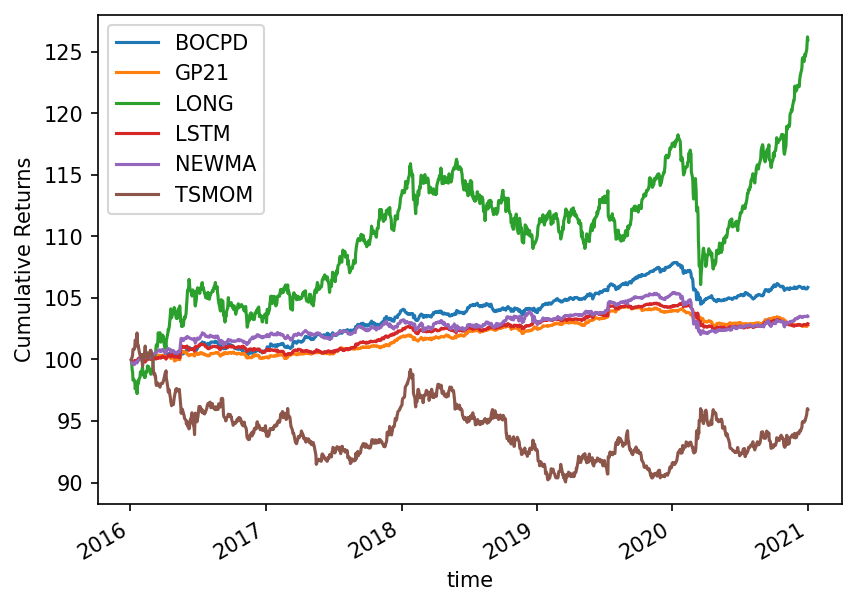

In [212]:
import matplotlib.pyplot as plt
labels = q.index.get_level_values(0).unique().tolist()

def plot_cum_returns(q, labels=None, title=None, start_date=None):
    if labels is None:
        labels = q.index.get_level_values(0).unique().tolist()
    for cp in labels:
        if cp in q.index.get_level_values(0):
            data = q.xs(cp)
            if start_date is not None:
                # Try to filter by date if possible
                try:
                    data = data[data.index >= start_date]
                except Exception:
                    pass
            plt.ylabel("Cumulative Returns")
            plt.xlabel("Date")
            
            data.plot(label=cp)
    if title:
        plt.title(title)
    plt.legend()

plot_cum_returns(q, labels, start_date  =None)
# q1.xs("none")[q1.xs("none").index >= "2019-11-01"].plot(label="returns")

# plt.title("Mean Captured Returns Over Time")
# plt.ylabel("Captured Returns (%)")
# plt.xlabel("Time")
# ax = plt.gca()
# import matplotlib.dates as mdates
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.gcf().set_dpi(150)
os.makedirs("plots", exist_ok=True)
plt.savefig("plots/cum_returns_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()



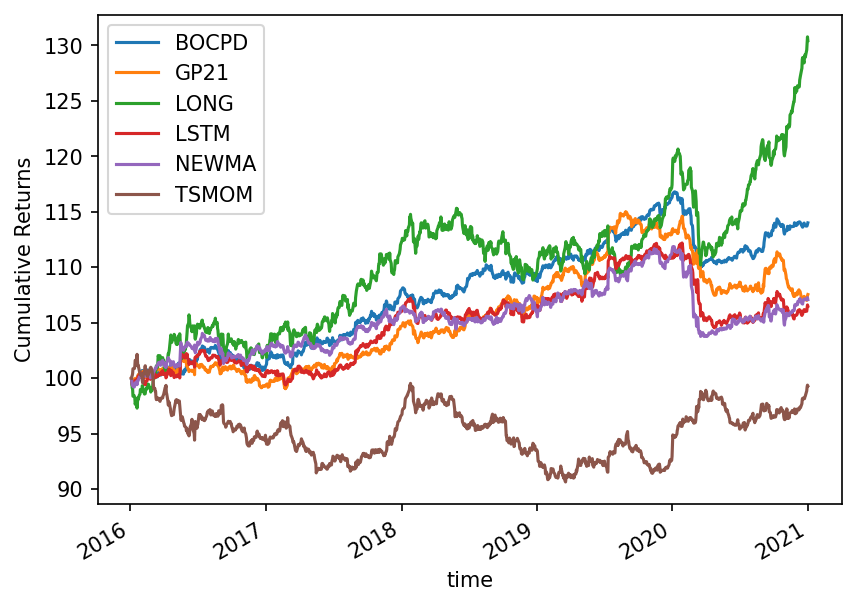

In [213]:
plot_cum_returns(q1, labels, start_date  =None)
plt.gcf().set_dpi(150)
plt.savefig("plots/cum_returns_plot_rescaled.pdf", format="pdf", bbox_inches="tight")




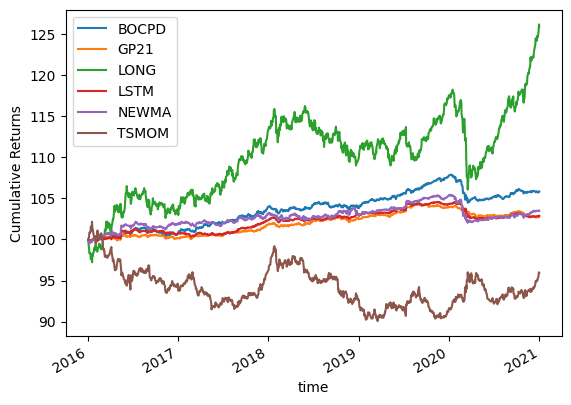

In [210]:
plot_cum_returns(q, labels)
# q1.xs("bocp21").plot(label="returns")


In [ ]:
import matplotlib.pyplot as plt
q.xs("none").plot(label="None")
q.xs("cp21").plot(label="CP21")
q.xs("bocp21").plot(label="boCP21")

plt.legend()
# q.xs("cp21").plot()

In [ ]:
file_path = "/home/mkoshil/Documents/projects/second_thesis/trading-momentum-transformer/data/quandl_cpd_21lbw/LIFFE_W.csv"
df_cpd = pd.read_csv(file_path)
df_cpd = df_cpd.set_index('date')
df_cpd['moving_avg'] = df_cpd['cp_score'].rolling(window=21).mean()
df_cpd
df_cpd["moving_avg"].plot(figsize=(10, 5), title='ICE Coffee C Price', grid=True)

